In [42]:
# Download raw data
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xvfz aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [43]:
# Prepare X and y variable
import os
imdb_dir = "aclImdb"
train_dir = os.path.join(imdb_dir, "train")

labels = []
text = []

for label_type in ["neg", "pos"]:
  label_dir = os.path.join(train_dir, label_type)
  for file_name in os.listdir(label_dir):
    if file_name[-4:] == ".txt":
      selected_file = open(os.path.join(label_dir, file_name))
      text.append(selected_file.read())
      selected_file.close()
      if label_type == "pos":
        labels.append(1)
      else:
        labels.append(0)


In [44]:
labels[:5]

[0, 0, 0, 0, 0]

In [45]:
text[:5]

["This was really a very bad movie. I am a huge fan of Italian Horror, Argento, Mario Bava, Fulci and yes, even our good friend here Lamberto sometimes comes out with a good one. I found the first two 'Demons' films to be highly entertaining - they were so bad they were great but this one is just so bad that it is really, really bad. It is intensely boring, the story never goes anywhere and I hated the characters - the wife slapping husband and whiny cry-baby pain in the *** wife drove me mad, there was nowhere near enough of the story devoted to the Ogre who was probably the best actor in the whole film. I turned it off about three quarters of the way through because I was very, very BORED! Don't bother.",
 'I voted 3 for this movie because it looks great as does all of Greenaways output. However it was his usual mix of "art" sex and pretentious crap.I know lots of people like this film but I grew tired of it VERY quickly. It is definitely not for everyone. The ubiquitous McGregor obv

In [46]:
# Randomly check few responds
from random import choices
random_index = choices(range(len(labels)), k=5)
random_index

[6384, 23630, 19885, 14424, 6878]

In [47]:
for sel_random_idx in random_index:
  print(labels[sel_random_idx])
  print(text[sel_random_idx])
  print()

0
The main reasons to see "Red Eye" are Rachel McAdams, who delivers a stellar performance, and Jayma Mays, who is wonderful as the Assistant Hotel Manager. On the other hand, Cillian Murphy overacts so badly that he becomes cartoonish. The rest of the movie is riddled with plot holes, on which I will elaborate.<br /><br />Please do not read further if you don't want to know what happens!<br /><br />Here is a synopsis of the plot. Rachel McAdams's character (Lisa) manages a hotel where the new hard-nosed Homeland Security Director plans to stay that night. Rachel is returning to Miami from a funeral, but fielding calls from her assistant up until the plane leaves. In the meantime, someone is stationed outside the house of her father, Joe (played by Brian Cox), ready to kill him if Cillian Murphy (Jackson) calls. All Lisa has to do is phone the hotel and move the Director's suite to one where Jackson's cohorts are planning to fire a guided missile (from a fishing boat) to kill the Direc

In [48]:
max_features = 5000

In [49]:
# Word Tokenization
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
sequences[0]

[11,
 13,
 63,
 3,
 52,
 75,
 17,
 10,
 241,
 3,
 663,
 334,
 4,
 1117,
 186,
 4381,
 4939,
 2,
 419,
 57,
 260,
 49,
 461,
 130,
 515,
 263,
 43,
 16,
 3,
 49,
 28,
 10,
 255,
 1,
 83,
 104,
 105,
 5,
 27,
 542,
 438,
 33,
 68,
 35,
 75,
 33,
 68,
 84,
 18,
 11,
 28,
 6,
 40,
 35,
 75,
 12,
 9,
 6,
 63,
 63,
 75,
 9,
 6,
 354,
 1,
 62,
 112,
 268,
 1760,
 2,
 10,
 1794,
 1,
 102,
 1,
 319,
 655,
 2,
 1408,
 893,
 1456,
 8,
 1,
 319,
 69,
 1165,
 47,
 13,
 1279,
 747,
 192,
 4,
 1,
 62,
 3975,
 5,
 1,
 34,
 13,
 239,
 1,
 115,
 281,
 8,
 1,
 223,
 19,
 10,
 676,
 9,
 122,
 41,
 286,
 4,
 1,
 93,
 140,
 85,
 10,
 13,
 52,
 52,
 1095,
 89,
 1409]

In [50]:
# Checking tokens of few words
tokenizer.word_index["i"]

10

In [51]:
tokenizer.word_index["yellow"]

4177

In [52]:
len(tokenizer.word_index)

88582

In [53]:
from keras import utils
max_words = 150
data = utils.pad_sequences(sequences, max_words)
data

array([[   0,    0,    0, ..., 1095,   89, 1409],
       [   0,    0,    0, ...,   11,    6, 3789],
       [  17,   90,   69, ...,   11, 1730,  620],
       ...,
       [ 107,    3, 1239, ...,  415,    4,  495],
       [ 360,   17,   18, ...,  149, 1832,   12],
       [   0,    0,    0, ..., 1549,  784,  450]], dtype=int32)

In [54]:
import numpy as np
y = np.asarray(labels)
y

array([0, 0, 0, ..., 1, 1, 1])

In [55]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

y_train = y[indices]
X_train = data[indices]

In [56]:
X_train

array([[   1, 4626,    4, ...,  143,    5, 1561],
       [4921,  244,   71, ...,    3, 3218,  308],
       [1641,  206,    1, ...,   19,   89, 1409],
       ...,
       [   0,    0,    0, ...,    4, 1688,  105],
       [  26,    6,  176, ...,    9,    6,  734],
       [   0,    0,    0, ...,    6,    3,   17]], dtype=int32)

In [57]:
y_train

array([1, 1, 0, ..., 0, 1, 0])

In [1]:
# GloVe embedding https://nlp.stanford.edu/projects/glove

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-07-24 21:34:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-07-24 21:34:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-07-24 21:34:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [59]:
# Parsing text file
embeddings_index = {}
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print("%s word vectors where found" % len(embeddings_index))

400000 word vectors where found


In [60]:
embedding_dim = 50

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_features:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [61]:
embedding_matrix[10]

array([ 1.18910000e-01,  1.52549997e-01, -8.20730031e-02, -7.41439998e-01,
        7.59169996e-01, -4.83280003e-01, -3.10090005e-01,  5.14760017e-01,
       -9.87079978e-01,  6.17570011e-04, -1.50429994e-01,  8.37700009e-01,
       -1.07969999e+00, -5.14599979e-01,  1.31879997e+00,  6.20069981e-01,
        1.37789994e-01,  4.71080005e-01, -7.28740022e-02, -7.26750016e-01,
       -7.41159976e-01,  7.52629995e-01,  8.81799996e-01,  2.95610011e-01,
        1.35479999e+00, -2.57010007e+00, -1.35230005e+00,  4.58799988e-01,
        1.00680006e+00, -1.18560004e+00,  3.47370005e+00,  7.78980017e-01,
       -7.29290009e-01,  2.51020014e-01, -2.61559993e-01, -3.46839994e-01,
        5.58409989e-01,  7.50980020e-01,  4.98299986e-01, -2.68229991e-01,
       -2.74430006e-03, -1.82980001e-02, -2.80959994e-01,  5.53179979e-01,
        3.77059989e-02,  1.85550004e-01, -1.50250003e-01, -5.75119972e-01,
       -2.66710013e-01,  9.21209991e-01])

In [62]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_words))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 50)           250000    
                                                                 
 flatten_2 (Flatten)         (None, 7500)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                120016    
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 370,033
Trainable params: 370,033
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Loading GloVe embeddings
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 50)           250000    
                                                                 
 flatten_2 (Flatten)         (None, 7500)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                120016    
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 370,033
Trainable params: 120,033
Non-trainable params: 250,000
_________________________________________________________________


In [65]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

model.save_weights("trained_model.h5")

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6328 - acc: 0.6488 - val_loss: 0.5880 - val_acc: 0.6950
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5216 - acc: 0.7398 - val_loss: 0.5678 - val_acc: 0.7188
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4647 - acc: 0.7748 - val_loss: 0.5617 - val_acc: 0.7120
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4121 - acc: 0.8048 - val_loss: 0.6350 - val_acc: 0.7022
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3641 - acc: 0.8297 - val_loss: 0.7163 - val_acc: 0.6992
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3196 - acc: 0.8493 - val_loss: 0.6532 - val_acc: 0.7066
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2787 - acc: 0.8687 - val_loss: 0.8425 - val_acc: 0.7086
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

In [66]:
model = Sequential()

model.add(Embedding(max_features, embedding_dim, input_length = max_words))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 50)           250000    
                                                                 
 flatten_3 (Flatten)         (None, 7500)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                120016    
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 370,033
Trainable params: 370,033
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 50)           250000    
                                                                 
 flatten_3 (Flatten)         (None, 7500)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                120016    
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 370,033
Trainable params: 370,033
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_split=0.2)
model.save_weights("trained_model_v2.h5")

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5852 - acc: 0.6870 - val_loss: 0.4850 - val_acc: 0.7670
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3951 - acc: 0.8220 - val_loss: 0.4244 - val_acc: 0.8114
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3048 - acc: 0.8722 - val_loss: 0.4238 - val_acc: 0.8160
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.2342 - acc: 0.9061 - val_loss: 0.4872 - val_acc: 0.7982
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1716 - acc: 0.9327 - val_loss: 0.6022 - val_acc: 0.8090
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.1154 - acc: 0.9563 - val_loss: 0.5688 - val_acc: 0.8224
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0692 - acc: 0.9754 - val_loss: 0.6716 - val_acc: 0.8214
Epoch 8/10
625/625 [==============================] - 5s 8ms/step - loss:

In [69]:
history.history

{'loss': [0.5851898193359375,
  0.3950843811035156,
  0.304758757352829,
  0.23424023389816284,
  0.17161400616168976,
  0.11535927653312683,
  0.06915305554866791,
  0.038686566054821014,
  0.02135556936264038,
  0.013050074689090252],
 'acc': [0.6869500279426575,
  0.8219500184059143,
  0.8721500039100647,
  0.9060500264167786,
  0.9326500296592712,
  0.9563000202178955,
  0.975350022315979,
  0.9876499772071838,
  0.9933500289916992,
  0.9951500296592712],
 'val_loss': [0.48504915833473206,
  0.4243946373462677,
  0.42379531264305115,
  0.4872126579284668,
  0.6021960377693176,
  0.5687659978866577,
  0.6716210246086121,
  0.7997614741325378,
  0.9579049944877625,
  1.1021040678024292],
 'val_acc': [0.7670000195503235,
  0.8113999962806702,
  0.8159999847412109,
  0.7982000112533569,
  0.8090000152587891,
  0.8223999738693237,
  0.821399986743927,
  0.8167999982833862,
  0.8205999732017517,
  0.8181999921798706]}

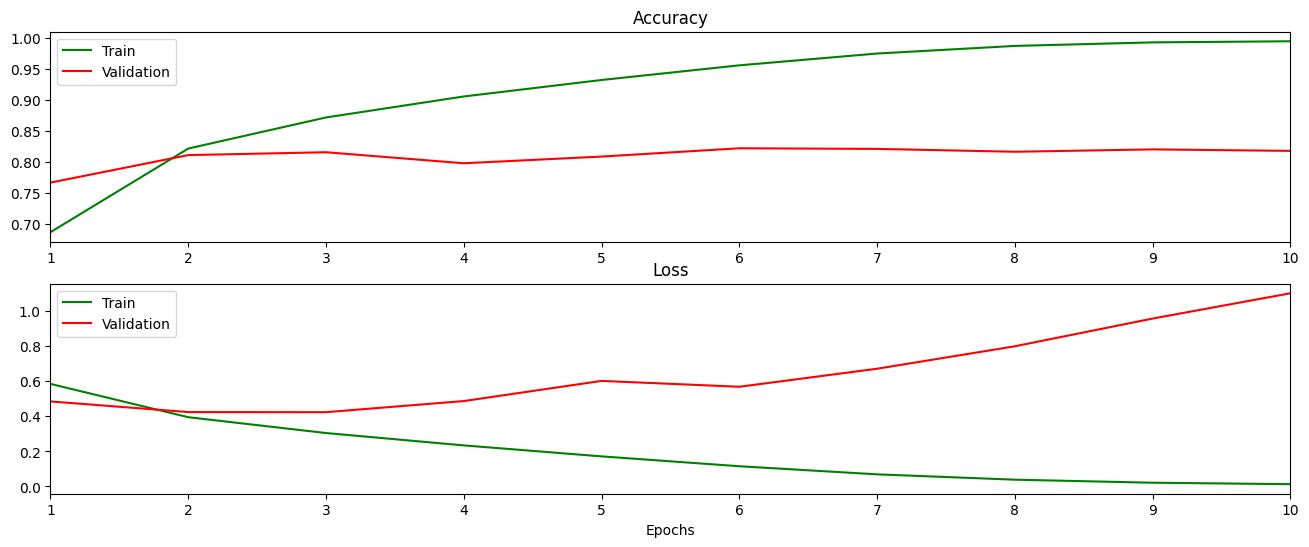

In [70]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1, len(acc)+1)

fig = plt.figure(figsize=(16, 6))
    # Accuracy
fig.add_subplot(211)
plt.plot(epochs, acc, color='green', label='Train')
plt.plot(epochs, val_acc, color='red', label='Validation')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.xlim(epochs.min(), epochs.max())

    # Loss
fig.add_subplot(212)
plt.plot(epochs, loss, color='green', label='Train')
plt.plot(epochs, val_loss, color='red', label='Validation')
plt.legend(loc='upper left')
plt.title('Loss')
plt.xlabel('Epochs')
plt.xlim(epochs.min(), epochs.max())

plt.show()